# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
В нашем распоряжении имеются данные об исторических продажах видеоигр, экспертных и пользовательских оценках,жанрах и платформах.




**Целью анализа** является выявление закономерностей, определяющих успешность видеоигры.

В ходе анализа требуется:
 - 1. Изучить исходные данные;
 - 2. Подготовить данные к анализу;
 - 3. Провести исследовательский анализ:
     -  1.Посмотреть на распределение выпуска игр по годам;
     -  2.Рассчитать средний жизненный цикл платформы, посмотреть как меняются продажи по годам;
     -  3.Выбрать наиболее оптимальный период для анализа, выделить  лидирующие платформы по продажам, оценить тенденцию продаж каждоый платформы( растут продажи или падают);
     -  4.Оценить влияние критиков и пользователей на на продажи в рамках одной популярной платформы, соотнести полученные выводы с другими платформами;
     -  5.посмотреть на распредление продаж по жанрам.
 - 4. Составить портрет пользователя по каждому регионы:
     -  1.Для каждого региона найти топ 5 популярных платформ;
     -  2.Для каждого региона найти топ 5 популярных жанров;
     -  3.Определить влияние рейтинга на продажи по каждому региону.
 - 5. Проверка гипотез
        

## Знакомство с данными

<font size=+1>Описание данных</font><br>

`Name` — название игры<br>
`Platform` — платформа<br>
`Year_of_Release` — год выпуска<br>
`Genre` — жанр игры<br>
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)<br>
`EU_sales` — продажи в Европе (миллионы проданных копий)<br>
`JP_sales` — продажи в Японии (миллионы проданных копий)<br>
`Other_sales` — продажи в других странах (миллионы проданных копий)<br>
`Critic_Score` — оценка критиков (максимум 100)<br>
`User_Score` — оценка пользователей (максимум 10)<br>
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию<br>
Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings
warnings.filterwarnings('ignore')

plt.style.use('dark_background')


In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().agg(['mean','sum'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
mean,0.00012,0.0,0.016093,0.00012,0.0,0.0,0.0,0.0,0.513192,0.400897,0.404786
sum,2.00000,0.0,269.000000,2.00000,0.0,0.0,0.0,0.0,8578.000000,6701.000000,6766.000000


In [6]:
df.duplicated().sum()

0

### Выводы
Для удобства можно изменить регистр столбцов<br>
Имеются пропуски в : `year_of_release`,`critic_score`, `user_score`, `rating`,`genre`<br>
Нжно изменить тип данных в : `year_of_release`,`user_score`
Явных дубликтов нет<br>


## Предобработка

Приведем название столбцов к нижнему регистру

In [7]:
df.columns = df.columns.str.lower()

Пропуски в name,year_of_release и  genre удалим, так как их меньше `5%`, на результате анализа это сказаться не должно

In [8]:
display(df.query('name.isna()'))
df = df.dropna(subset=['name','year_of_release','genre'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В user_score есть значение `tbd`, что означает "будет определено".<br>

Можно смело это значение заменить на NaN, а после привести тип данных к float.<br>

`year_of_release` приведем к int, можно и к datetime, в нашем анализе это не имеет значение.<br>

Заменять пропуски в `critic_score`, `rating`, `user_score` будет не правильно, так как это достаточно субъективные оценки.

In [9]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = df['year_of_release'].astype('int')

Для каждой игры посчитаем ее суммарные продажи в регионах

In [10]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


ESRB - это саморегулируемая организация, которая присваивает потребительским видеоиграм в Соединенных Штатах и Канаде рейтинги по возрасту и содержанию. Логично, что для других регионов он не заполняется.<br>
Тогда, в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе.
Обрабатывать пропуски в этом столбце будет некорректно.

### Вывод

В ходе предобработки избавились от незначительных пропусков, удалив их из `name`,`year_of_release`,`genre`<br>

Заменить пропуски в `critic_score`, `rating`, `user_score` на какие-либо значения не представляется возможным

## Исследовательский анализ

***Посмотрим на распределение выпуска игр по годам***

In [11]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

<AxesSubplot:title={'center':'Выпуск игр по годам'}, xlabel='Год', ylabel='количество выпущенных игр'>

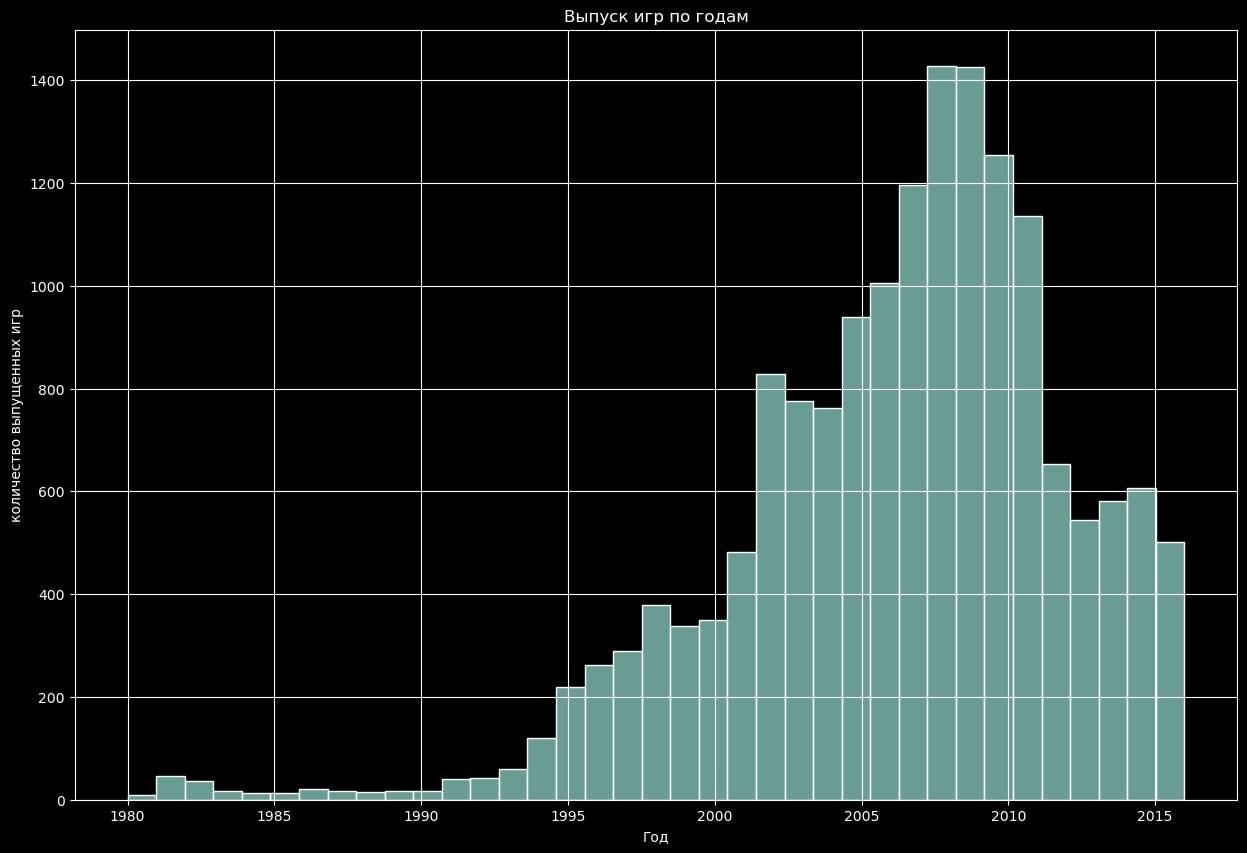

In [12]:
plt.figure(figsize=(15,10))
plt.grid()
plt.xlabel('Год')
plt.ylabel('количество выпущенных игр')
plt.title('Выпуск игр по годам')
sns.histplot(df['year_of_release'], bins=37)

С 1990  по 2001 наблюдается плавный рост.Рост технологий, вероятнее всего, вызвал бум и в 2002 количество выпущенных игр на рынке стало почти вдвое больше, по сравнению с прошлым годом, и продолжает расти до 2008-2009, с 2010 по 2015 производство игр падает, за 2015 год было произведено всего 606 игр. Возможно это обусловлено ростом рынка мобильных игр, купить телефон и скачать на нем игру выйдет дешевле, чем покупка консоли или сборка хорошего ПК, так еще и покупка игр на данные платформы.



***Посмотрим на продажи по платформам, для топовых платформ по продажам построим графики распределения их продаж по годам, найдем  средний жизненный цикл платформ***

<AxesSubplot:title={'center':'Продажи по платформам'}, xlabel='platform', ylabel='total_sales'>

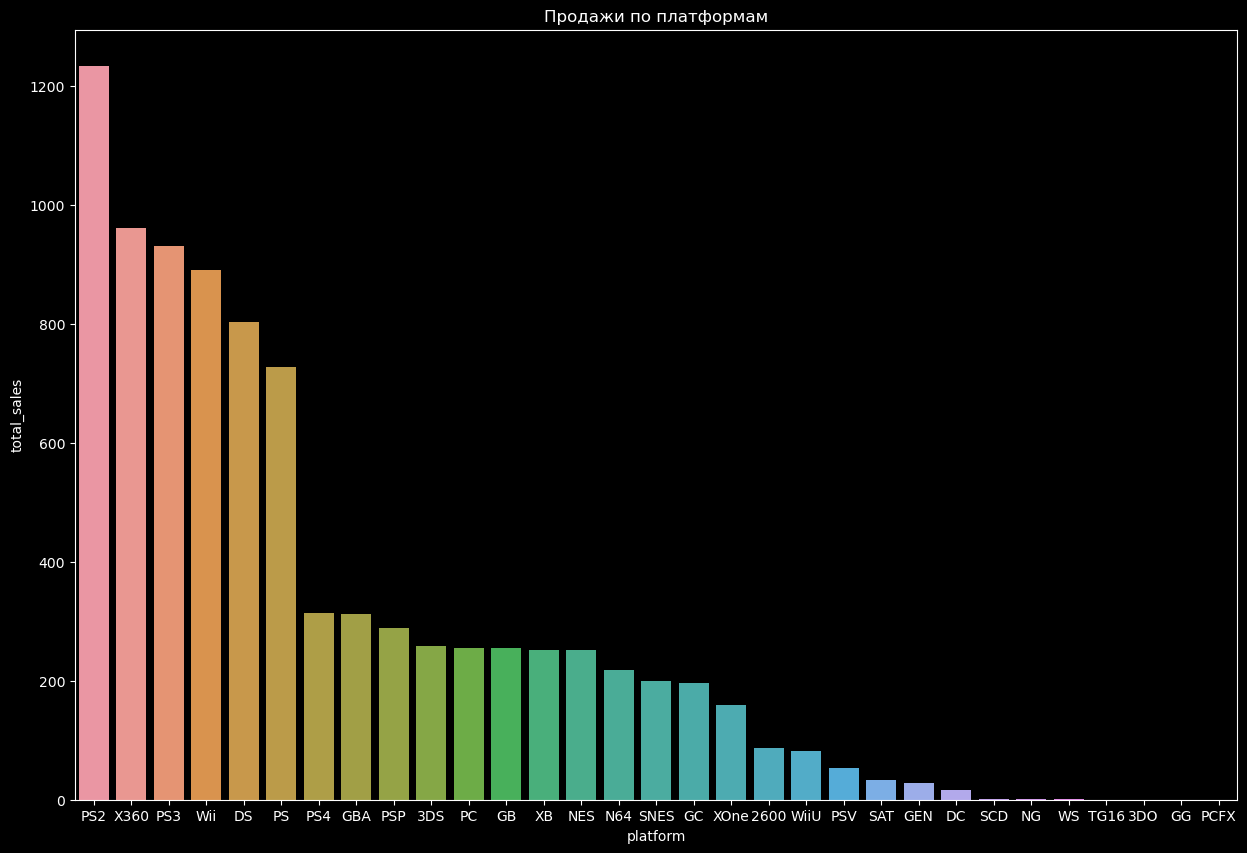

In [13]:
total_sales = df.groupby('platform')['total_sales'].sum().reset_index().sort_values('total_sales',ascending=False)

plt.figure(figsize=(15,10))
plt.title('Продажи по платформам')
sns.barplot(x=total_sales['platform'] , y=total_sales['total_sales'])

По итогу у  нас есть 6 плафторм, которые лидируют по продажам :  `PS2, X360, PS3, Wii, DS, PS` <BR>
    
Посмотрим на них подробнее

In [14]:
top_platforms = total_sales.head(6)
top_platforms

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58


***Для каждой платформы построим график распределения продаж по годам.***

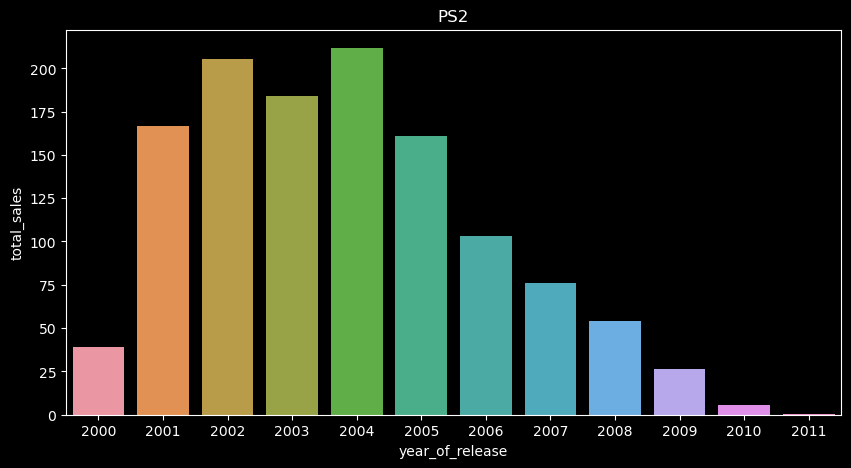

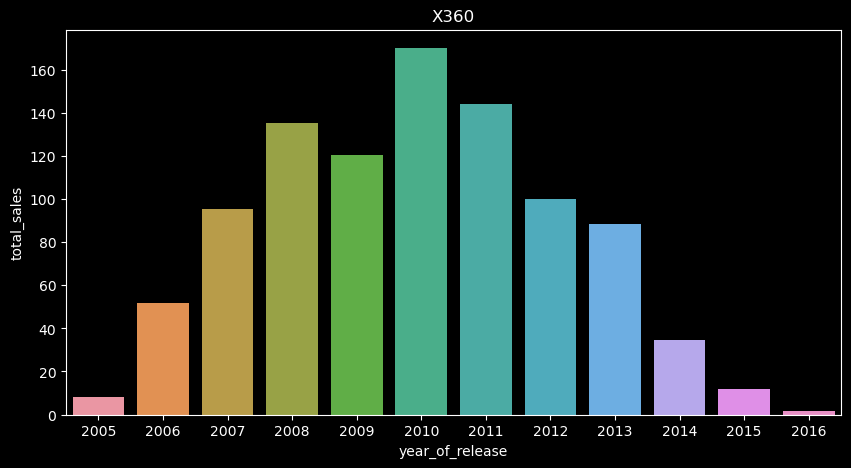

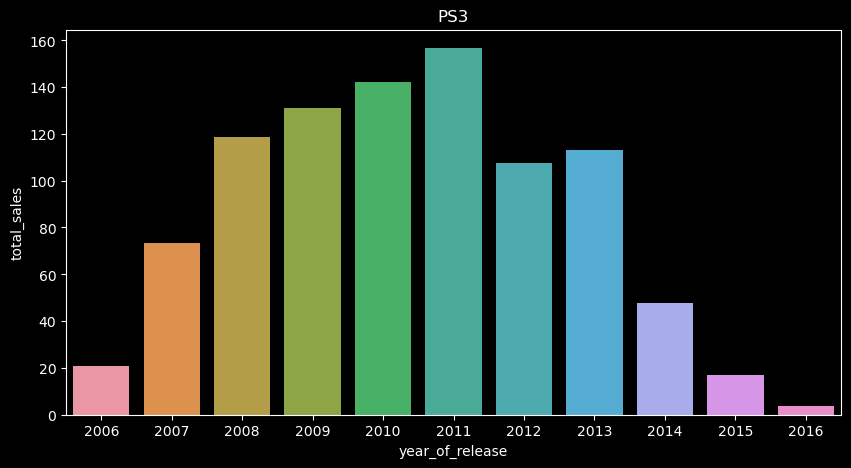

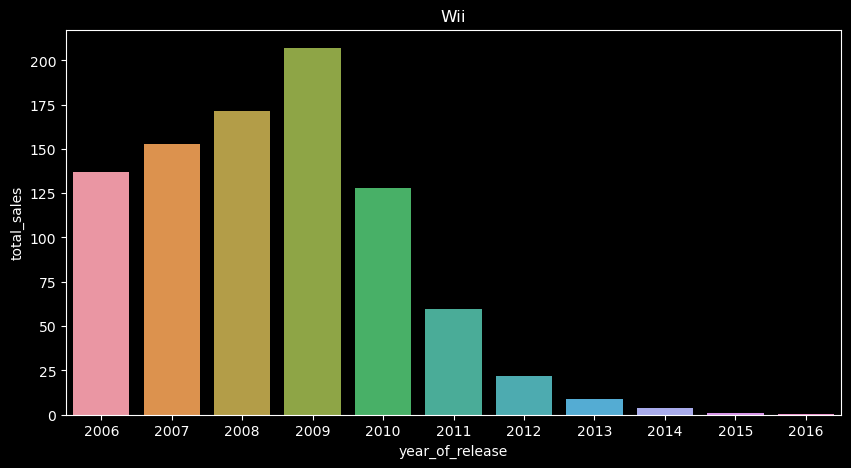

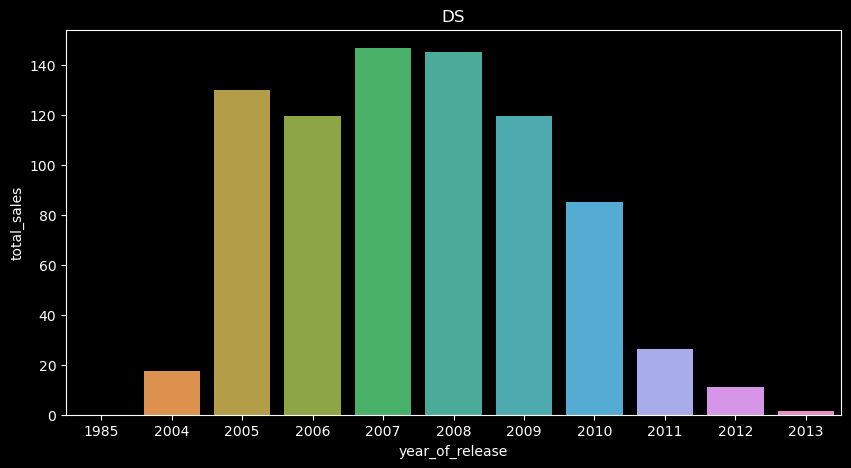

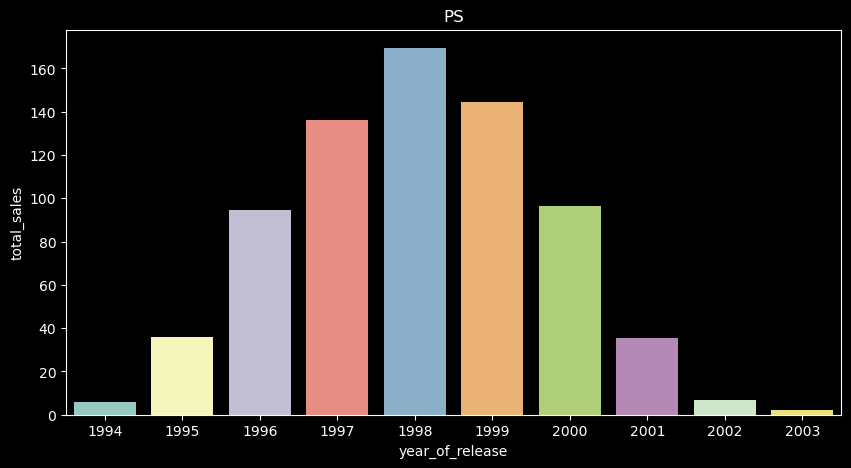

In [15]:
for i in top_platforms['platform']:
    platform = df.query('platform == @i').groupby('year_of_release')['total_sales'].sum().reset_index()
    plt.figure(figsize=(10,5))
    plt.xlabel('Год')
    plt.ylabel('Продажи')
    plt.title(i)
    sns.barplot(x=platform['year_of_release'], y=platform['total_sales'])
    

In [16]:
# У  платфтормы DS наблюдается артефакт
df[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [17]:
# На самом деле данная игра была выпущена в 2010, а не в 1985, заменим значения 
df['year_of_release'][(df['platform'] == 'DS') & (df['name'] == 'Strongest Tokyo University Shogi DS')] = 2010
df[(df['platform'] == 'DS') & (df['name'] == 'Strongest Tokyo University Shogi DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,2010,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


У каждой платформы пик продаж наступает спустя 4-5 лет после выхода платформы<br>
Так же мы видим, что  на 2016 год платформы `PS`, `PS2` и `DS` уже не актуальны так как последние продажи по ним были в 2003, 2011 и 2013 соответственно.

***Рассчитаем средний цикл жизни для платформы***

In [18]:
l_c = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min','max'])
l_c.columns = l_c.columns.to_flat_index()
l_c.columns = ['min','max']
l_c['diff'] = l_c['max'] - l_c['min']
display(l_c.sort_values('min',ascending=False))
l_c['diff'].describe()

,min,max,diff
platform,,,
XOne,2013,2016,3
PS4,2013,2016,3
WiiU,2012,2016,4
3DS,2011,2016,5
PSV,2011,2016,5
PS3,2006,2016,10
Wii,2006,2016,10
X360,2005,2016,11
PSP,2004,2015,11


count    31.000000
mean      7.000000
std       5.899152
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: diff, dtype: float64

Если опираться на данные сводной таблицы, то можно сказать, что консоли компаний `Sony`,`Nintendo` и `Microsoft` держутся на рынке от 8 до 11 лет.
Вполне естественно, что ПК является старичком, так как его возможности в поддержке игр заключаются лишь в его железе, которое подвергается апгрейд*<br>

Если же опираться на статистику, то в среднем цикл жизни платфомры составляет  `7` лет<br>

Для дальнейшей анализа стоит взять период продаж за последние 3 года

***Посмотрим на продажи игр по платформам за выбранный период, найдем потенциально прибыльные платформы***

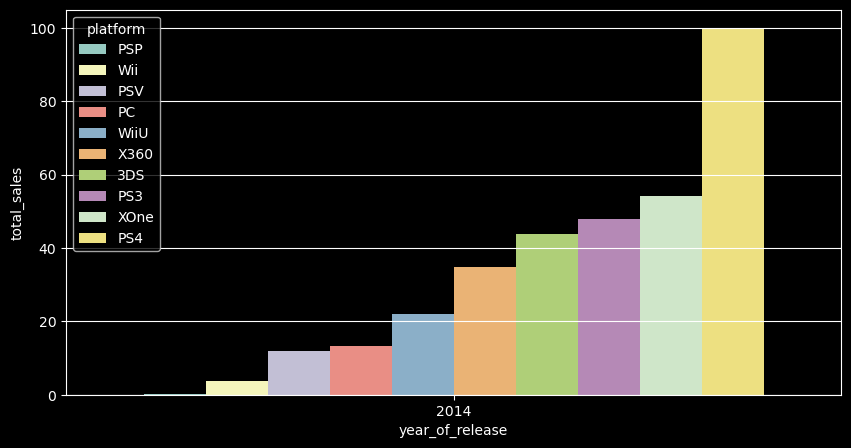

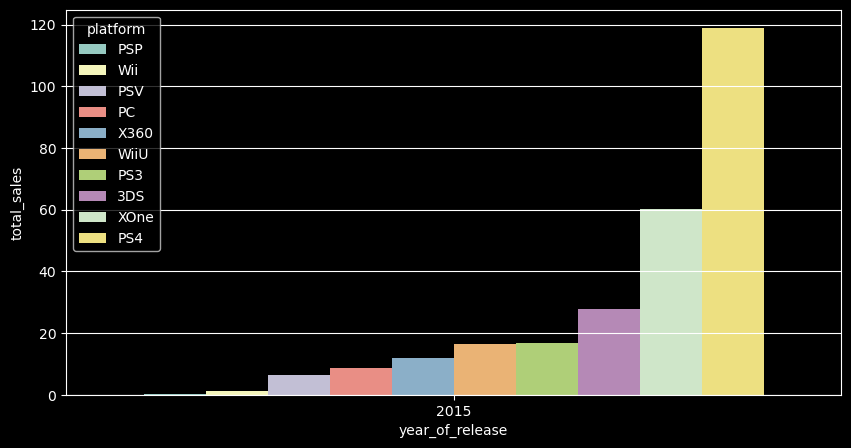

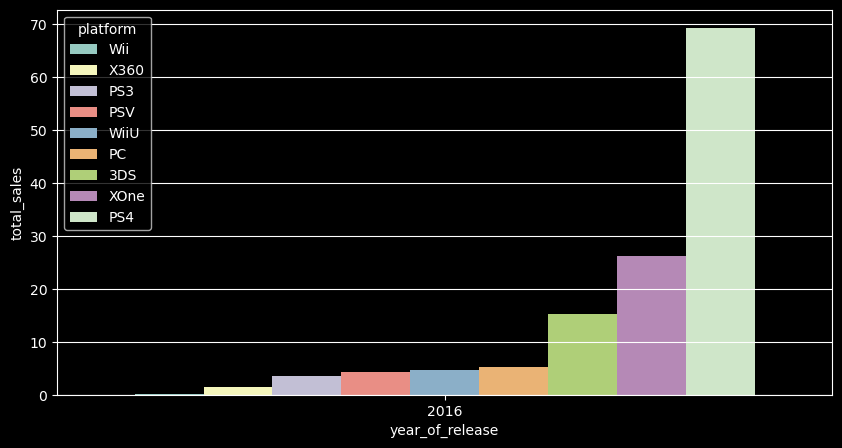

In [19]:
df_1 = df.query('year_of_release > 2013')
df_1_group  = df_1.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
for i in np.sort(df_1_group['year_of_release'].unique()):
    plt.figure(figsize=(10,5))
    plt.grid()
    plt.xlabel(i)
    sns.barplot(data=df_1_group.query('year_of_release == @i').sort_values('total_sales'),
                x = 'year_of_release', y='total_sales', hue='platform')
    


Выведем сводную таблицу:

In [20]:
df_1.pivot_table(index='platform', columns='year_of_release', values='total_sales',
                     aggfunc='sum', margins=True,fill_value=0).sort_values('All',ascending=False)

year_of_release,2014,2015,2016,All
platform,,,,
All,331.53,267.98,129.94,729.45
PS4,100.00,118.90,69.25,288.15
XOne,54.07,60.14,26.15,140.36
3DS,43.76,27.78,15.14,86.68
PS3,47.76,16.82,3.60,68.18
X360,34.74,11.96,1.52,48.22
WiiU,22.03,16.35,4.60,42.98
PC,13.28,8.52,5.25,27.05
PSV,11.90,6.25,4.25,22.40


В 2013 году на рынке уже пять новых платформ: `PSV`,`3DS`,`WiiU`,`PS4` и `XOne`. Из них в продажах растут только `PS4` и `XOne`.Данные по продажам за 2016 год анализировать не корректно, так как данные за него могут быть не полными,  по графику за 2016 год мы лишь можем судить о том, какие платформы будут еще актуальны в 2017.<br>
Опираясь на полученные данные в ходе анализа , можно предположить, что потенциально прибыльными в 2017 будут `PS4` и `XOne`. За 'неполный' 2016 год они лидеры по продажам, по сравнению с другими платформами.<br>

Для дальнейшего анализа оставим из новых платформ только `3DS`,`WiiU`,`PS4`,`XOne` и добавим к ним `PC`, так как эта унверсальная платформа.


***Посмоторим на продажи игр по платформам, воспользовавшись диаграммой размаха***

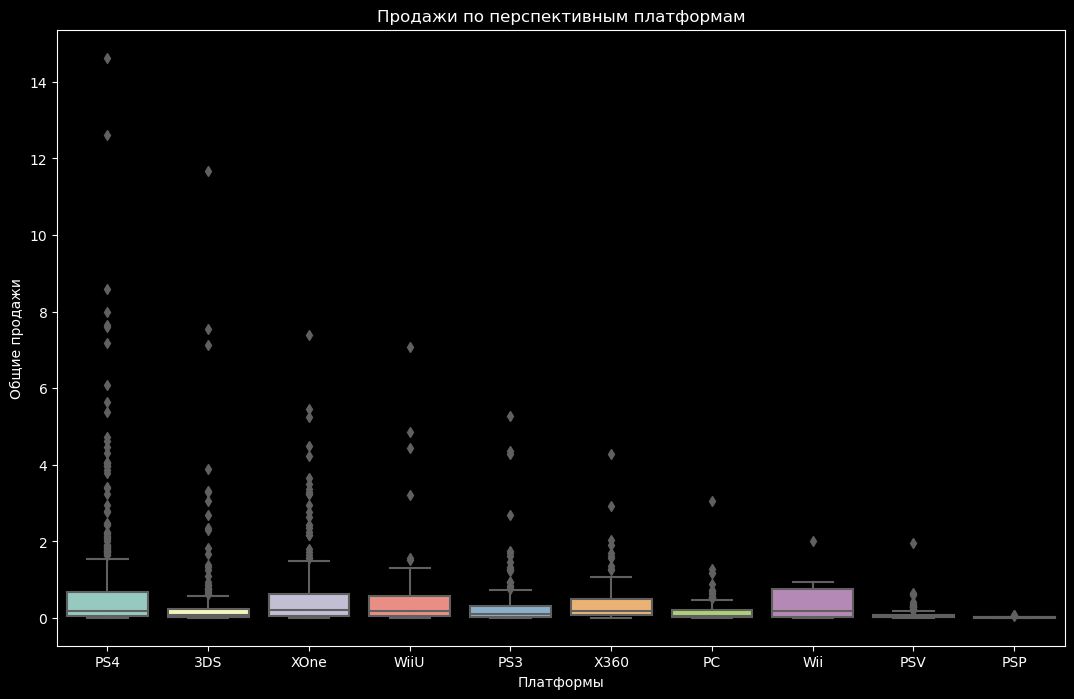

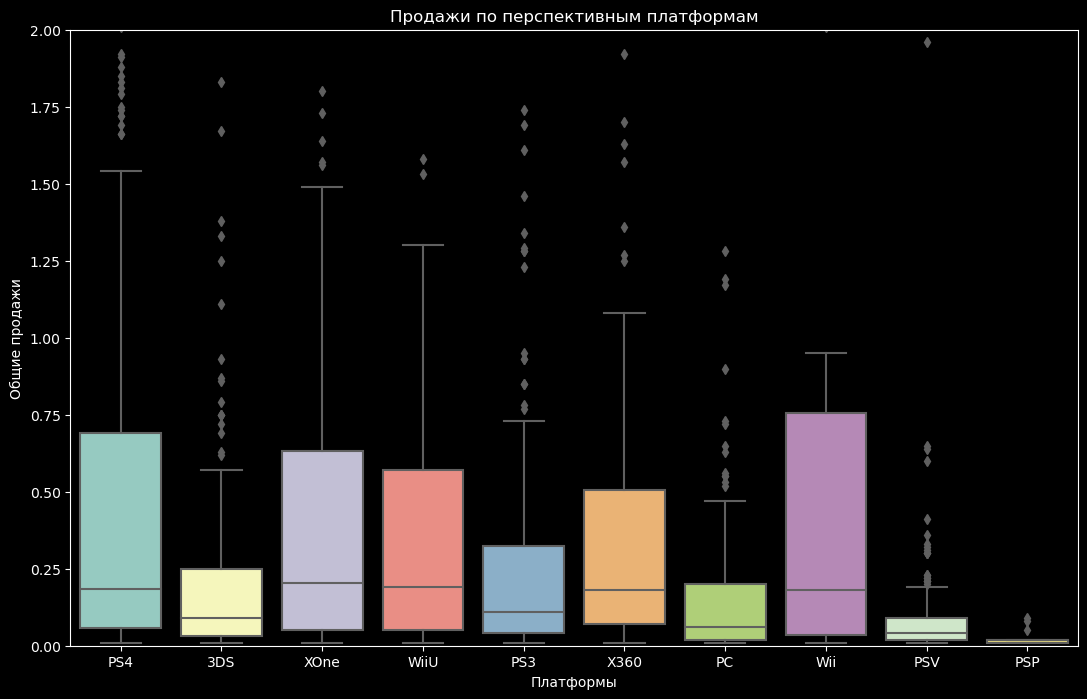

In [21]:
data, y = df_1, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

Платформы `PS4`,`WiiU`,`Wii`,`X360`,`XOne` имеют близкий к друг другу показатель медианных продаж , их можно назвать топом.Следом за ними расположилис `PS3` и `PC`.

У `PS4` на графике видны  большие "выбросы", возможно это продажи игр, которые являются хитами и эксклюзивами. Так как у данная платформа попадает в топ по медианным продажам, а так же является топ 1 по продажам за выбранный период, выберем ее как популярную платформу

*Выберем в качестве популряной платфомры `PS4`*

Значение корреляции между оценкой критиков и продажами:  0.40266141068104083


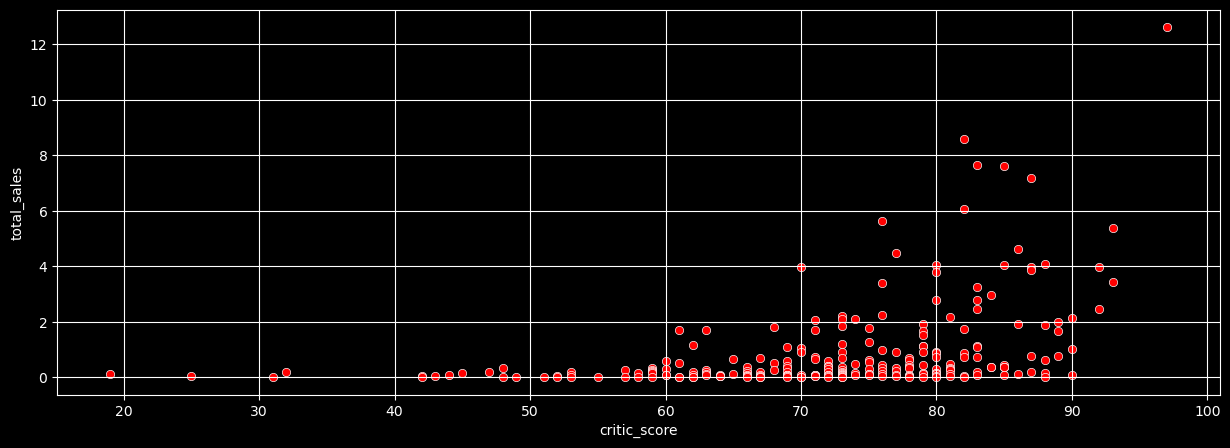

In [22]:
platform = df_1[df_1['platform'].isin(['PS4','WiiU','3DS','XOne','PC'])]

plt.figure(figsize=(15,5))
plt.grid()
sns.scatterplot(data=platform.query('platform == "PS4" '), x='critic_score', y='total_sales', color='red')
print('Значение корреляции между оценкой критиков и продажами: ',platform.query('platform == "PS4" ')['critic_score']
                                      .corr(platform.query('platform == "PS4" ')['total_sales']))


Значение корреляции между пользовательской оценкой и продажами:  -0.040131589472697356


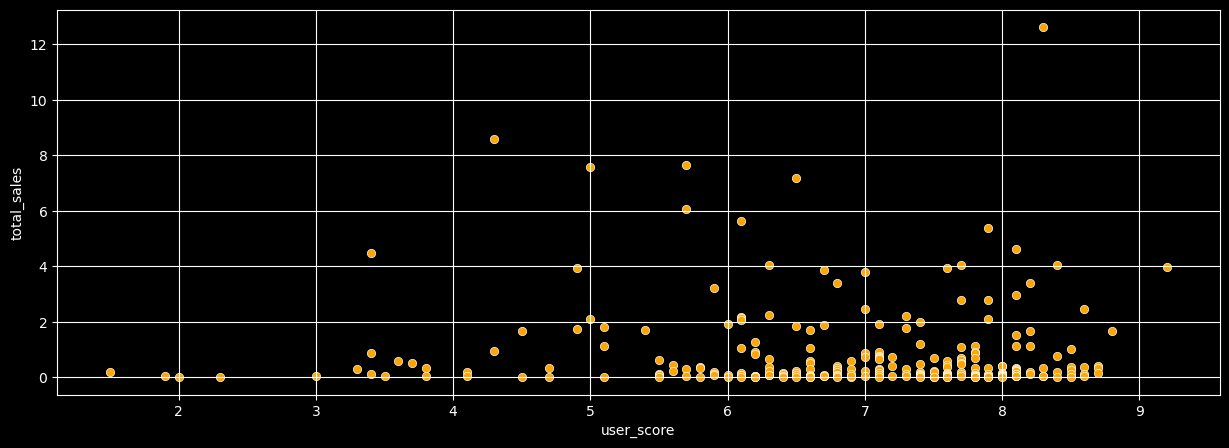

In [23]:
plt.figure(figsize=(15,5))
plt.grid()
sns.scatterplot(data=platform.query('platform == "PS4" '), x='user_score', y='total_sales', color='orange')
print('Значение корреляции между пользовательской оценкой и продажами: ',platform.query('platform == "PS4" ')['user_score']
                                      .corr(platform.query('platform == "PS4" ')['total_sales'])) 

И так, в рамках `PS4` можно сказать, что оценка пользователя на продажи не оказывает никакого влияния. А вот оценка критиков  оказывает умеренной влияние**<br>
Посмотрим, как полученные результаты соотносятся с другими платформами

In [24]:
for i in platform.query('platform != "PS4"')['platform'].unique():
    print('Платформа: ',i)
    print('Значение корреляции между оценкой критиков и продажами: ',platform.query('platform == @i ')['critic_score'].corr(platform.query('platform == @i ')['total_sales']))
    print('Значение корреляции между пользовательской оценкой и продажами: ',platform.query('platform == @i ')['user_score'].corr(platform.query('platform == @i ')['total_sales']))
    print()
    

Платформа:  3DS
Значение корреляции между оценкой критиков и продажами:  0.314117492869051
Значение корреляции между пользовательской оценкой и продажами:  0.2151932718527028

Платформа:  XOne
Значение корреляции между оценкой критиков и продажами:  0.42867694370333226
Значение корреляции между пользовательской оценкой и продажами:  -0.0703839280647581

Платформа:  WiiU
Значение корреляции между оценкой критиков и продажами:  0.370201412480884
Значение корреляции между пользовательской оценкой и продажами:  0.40792645792170773

Платформа:  PC
Значение корреляции между оценкой критиков и продажами:  0.17463413769350036
Значение корреляции между пользовательской оценкой и продажами:  -0.07159665703472451



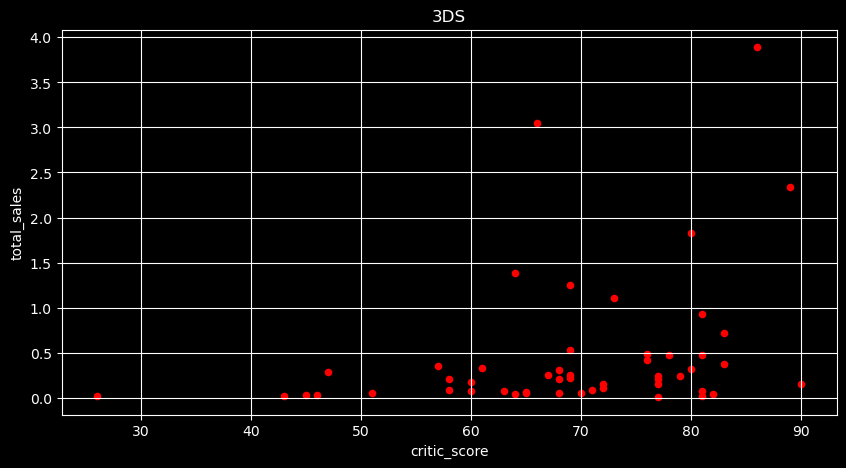

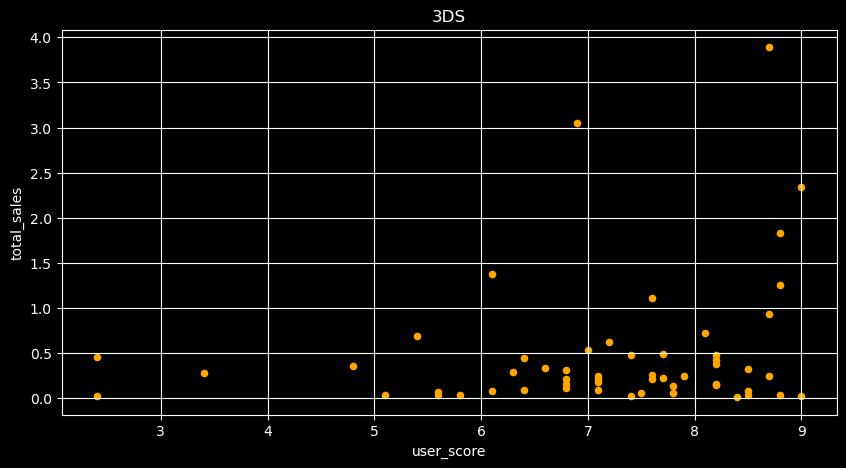

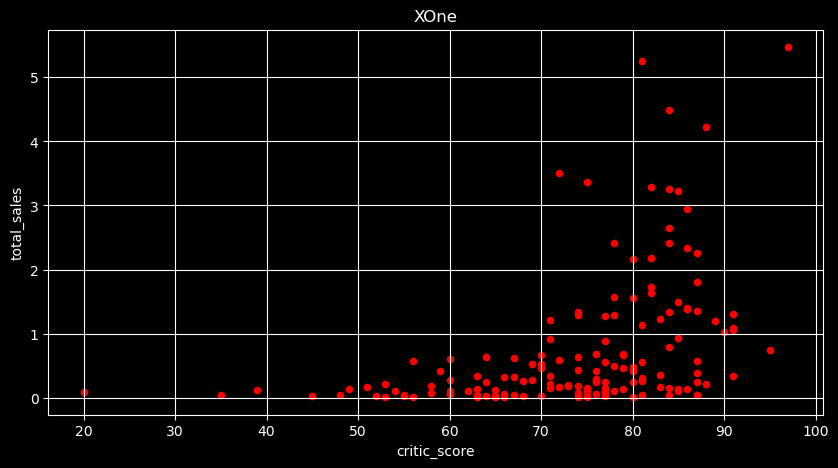

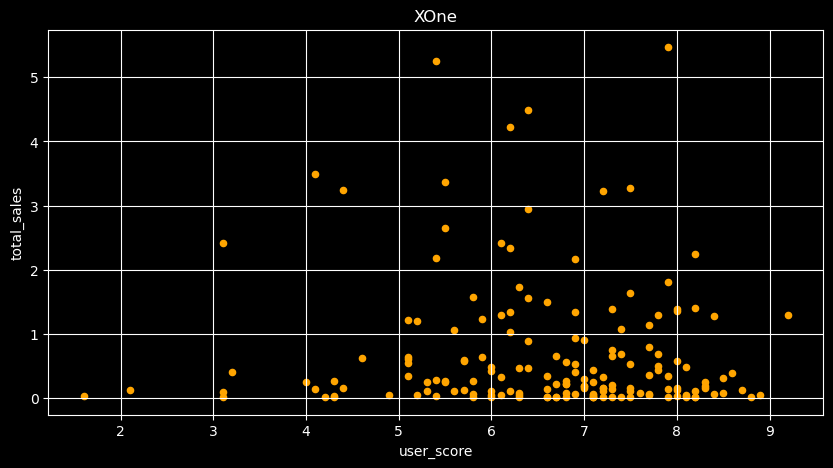

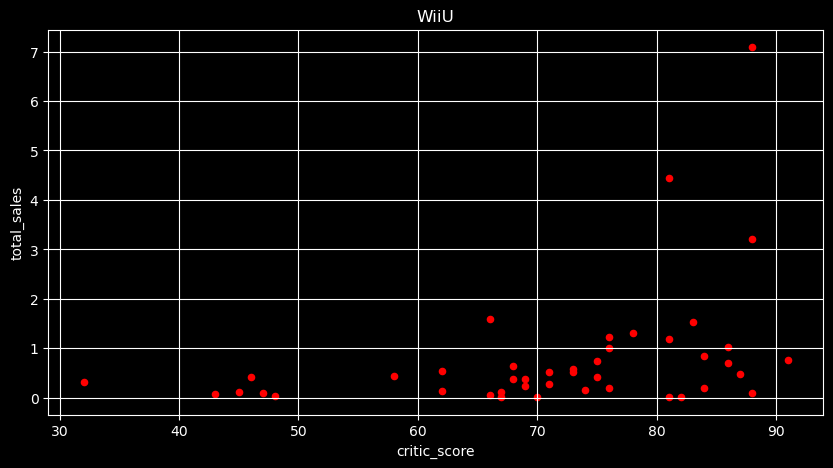

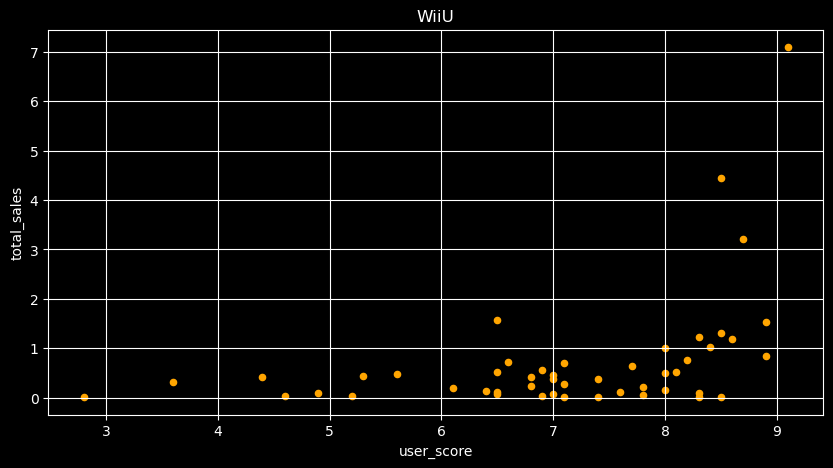

In [25]:
for i in platform.query('platform != "PS4"')['platform'].unique()[:3]:
    platform.query('platform == @i').plot.scatter('critic_score', 'total_sales',color='red',title=i,figsize=(10,5),grid=True)
    platform.query('platform == @i').plot.scatter('user_score', 'total_sales',color='orange',title=i,figsize=(10,5),grid=True)
    

На платформе `XOne` и у `PC` можно наблюдать ту же ситуации, как и в предыдущем анализе, у платформ компании `Nintendo` пользователи уже начинают оказывать умеренное влияние на продажи.

***Посмотрим на распределение игр по жанрам***

In [26]:
platform['genre'].value_counts()

Action          384
Role-Playing    128
Shooter          98
Sports           94
Adventure        74
Misc             72
Racing           50
Simulation       37
Strategy         32
Fighting         31
Platform         29
Puzzle           11
Name: genre, dtype: int64

In [27]:
platform.groupby('genre')['total_sales'].median().reset_index().sort_values('total_sales',ascending=False)

,genre,total_sales
8,Shooter,0.540
10,Sports,0.240
7,Role-Playing,0.200
4,Platform,0.190
2,Fighting,0.160
0,Action,0.110
9,Simulation,0.110
3,Misc,0.105
6,Racing,0.100
1,Adventure,0.060


<AxesSubplot:xlabel='genre', ylabel='total_sales'>

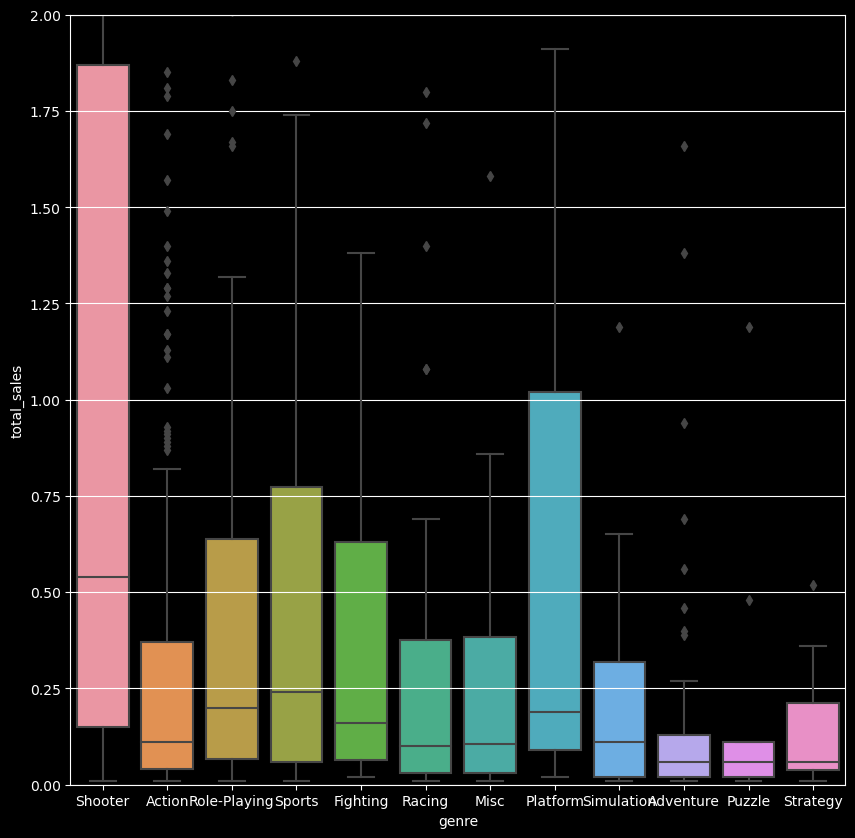

In [28]:
plt.figure(figsize=(10,10))
plt.grid()
plt.ylim(0,2)
plt.xlabel(i)
sns.boxplot(data=platform,
            x = 'genre', y='total_sales') 

Игры в жанрах `Action`, `Shooter`, `Sports`, `RPG` заняли топ-4 по количеству игр таких жанров.<br>
По средним продажам `Action` уступает, и в топ 4 попадет жанр `Platform`.




### Вывод

Актуальный период, данные которого помогут построить прогноз на 2017 - это 2014-2016 годы
самые перспективные платформы: PS4 и XOne
Оценки критиков и пользователей не имеют выраженного влияния на объемы продаж
Игры жанров:  `Platform`, `Shooter`, `Sports`, `RPG` являются топ-4 по средним продажам, самый продаваемый жанр `Shooter`.

    

## Портрет пользователя

***Предпочтение платформ по регионам***

In [29]:
regions_platform = platform.pivot_table(index = ['platform'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum')
regions_platform = (regions_platform / regions_platform.sum())
regions_platform

,eu_sales,jp_sales,na_sales
platform,,,
3DS,0.072116,0.661384,0.098817
PC,0.080392,0.000000,0.031557
PS4,0.581756,0.224548,0.430405
WiiU,0.058829,0.109284,0.084501
XOne,0.206907,0.004784,0.354720


*Европа*

<AxesSubplot:title={'center':'eu_sales'}, ylabel='eu_sales'>

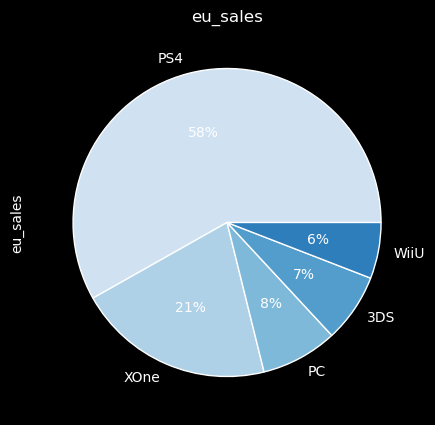

In [30]:
plt.title('eu_sales')
x = [1, 2, 3, 4, 5]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
regions_platform['eu_sales'].sort_values(ascending=False).head(5).plot(kind='pie',autopct='%.0f%%',
                                                                       wedgeprops={"linewidth": 1, "edgecolor": "white"},
                                                                       colors = colors,figsize=(10,5))



*Япония*

<AxesSubplot:title={'center':'jp_sales'}, ylabel='jp_sales'>

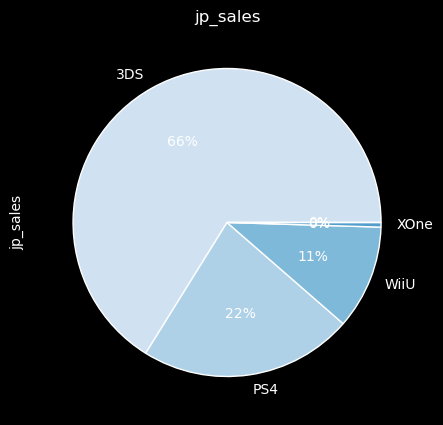

In [31]:
plt.title('jp_sales')
x = [1, 2, 3, 4, 5]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
regions_platform['jp_sales'].sort_values(ascending=False).head(5).plot(kind='pie',autopct='%.0f%%',
                                                                       wedgeprops={"linewidth": 1, "edgecolor": "white"},
                                                                       colors = colors, figsize=(10,5))


*Америка*

<AxesSubplot:title={'center':'na_sales'}, ylabel='na_sales'>

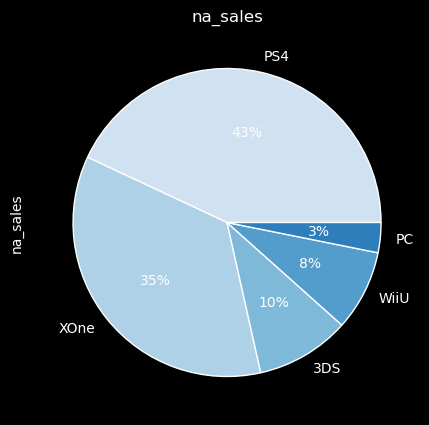

In [32]:
plt.title('na_sales')
x = [1, 2, 3, 4, 5]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
regions_platform['na_sales'].sort_values(ascending=False).head(5).plot(kind='pie',autopct='%.0f%%',
                                                                       wedgeprops={"linewidth": 1, "edgecolor": "white"},
                                                                       colors = colors, figsize=(10,5))

В Европе и Америке большую долю составляет `PS4` в 41% и 30% соответственно. НА  третьем месте `3DS` в 18% в европе и 23% в америке.А второе место различно: европа больше предпочтитает `PC`, а в америке `XOne`.<br>

Японце же консерваторы, используют только свои продукты. Так на первом месте у них `3DS` в 77%, на втором `PS4` в 12% и в остатке `WiiU`.

***Предпочтение жанров по регионам***

In [33]:

genre = {}
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    genre[i] = platform.groupby('genre')[i].sum().sort_values(ascending=False).head(5)
genre

{'na_sales': genre
 Shooter         65.97
 Action          59.55
 Sports          31.79
 Role-Playing    29.17
 Fighting        11.14
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action          62.12
 Shooter         56.07
 Sports          33.07
 Role-Playing    25.44
 Racing          12.91
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    24.01
 Action          19.81
 Fighting         4.55
 Shooter          4.20
 Misc             3.32
 Name: jp_sales, dtype: float64}

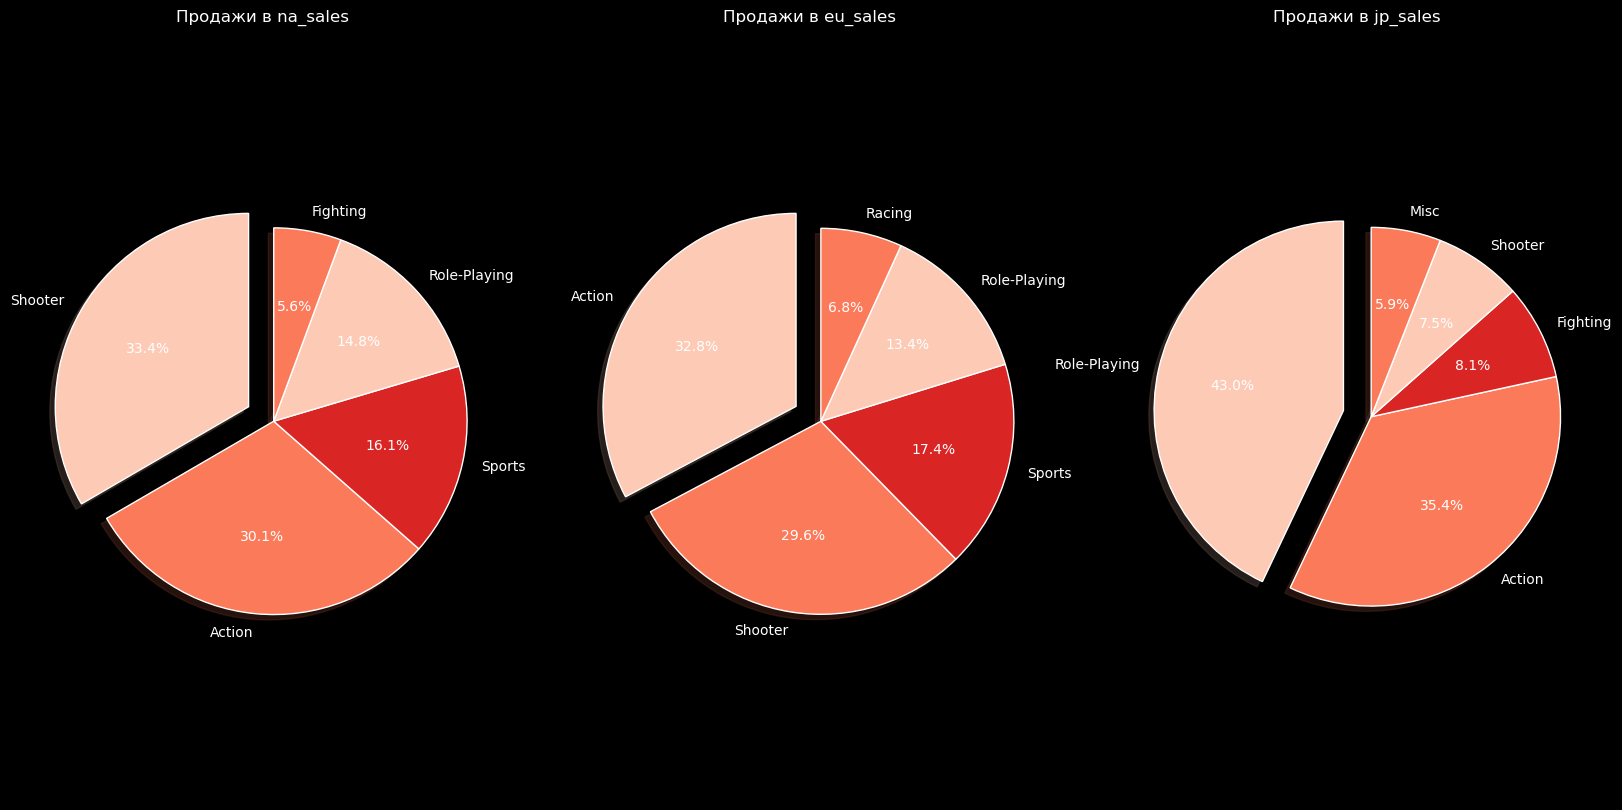

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)


colors = plt.get_cmap('Reds')(np.linspace(0.2, 0.7, len(x)))

#Цикл для вывода диаграмм распределения жанров 
for i in [0,1,2]:
    labels = genre[region[i]].index
    sizes = genre[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors) 
    ax.axis('equal')  

plt.show()

 В Eвропе и Америке топ 3 жанра совпадают: `Action`, `Shooter`, `Sports`. Игры  в жанре `Action` европейцы предпочтиают больше, чем `Shooter`, в америке наоборот. Жанр `Sports` в обоих регионах на 3 месте
Японцы же любят `RPG`,`Action`

***Влияние рейтинг ERSB на продажи***

In [35]:
na_rate = df.groupby('rating',dropna=False)['na_sales'].sum().sort_values(ascending=False)
eu_rate = df.groupby('rating',dropna=False)['eu_sales'].sum().sort_values(ascending=False)
jp_rate = df.groupby('rating',dropna=False)['jp_sales'].sum().sort_values(ascending=False)

In [36]:
na_rate

rating
E       1274.24
NaN     1225.84
T        747.60
M        742.89
E10+     345.50
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64

In [37]:
eu_rate

rating
E       703.87
NaN     609.65
M       480.00
T       421.79
E10+    183.35
AO        0.61
K-A       0.27
EC        0.11
RP        0.03
Name: eu_sales, dtype: float64

In [38]:
jp_rate

rating
NaN     836.74
E       197.96
T       150.70
M        63.58
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64


Во всех регионах, если не учитывать игры, укоторых рейтинг не указан, на первом месте игры с рейтингом для всех возрастов.В японии и америке на втором месте игры для подростков, на третьем для взрослых, в европе наоборот.


### Вывод

В Америке и Европе портрет пользователя схож:
- в обоих регионрах предпочитают плафтормы `PS4` и `Xone` другим
- самыми популярным жанрами являются `Action`, `Shooter`, `Sports`<br>
В Японии:
- предпочитают свои платформы, особенно `3DS`
- самым популярным жанром является `RPG`,  на втором месте `Action`

Во всех регионов предпочитают игры с рейтингом Е, этот рейтинг на перовм месте, а также игры с рейтингом Т и М. В Америке и Японии рейтинг Т на втором месте, М на третьем. В Европе обратная ситуация.



## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы

*H0: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.*<br>
*H1: средние пользовательские рейтинги платформ Xbox One и PC различаются.*<br>

In [39]:
import scipy.stats as st
samp_pc = df.query('platform == "PC"')['user_score'].dropna()
samp_xone = df.query('platform == "XOne"')['user_score'].dropna()

test1 = st.ttest_ind(samp_pc,samp_xone,equal_var=False)

alpha = 0.05
print(test1.pvalue)
if test1.pvalue > alpha:
    print('Не отвергаем')
else:
    print('Отвергаем')


4.5385802963771835e-06
Отвергаем


In [40]:
#Средние значения
display(samp_pc.mean())
display(samp_xone.mean())

7.065960264900677

6.52142857142857

Использовался метод  sе.ttest_ind (array1, array2, equal_var = False), так как мы сравниваем две независимые друг от друга выборки, equal_var = False так как мы не знаем  размеры выборок и  их стандартные отклонения

В результате проверки мы вынуждены отвергнуть нулевую гипотезу, что говорит нам о том, что средние пользовательские рейтинги с большой вероятностью разные.Посчитав средние пользовательские оценки для этих выборок, мы видим подтверждение выводу гипотезы

### Средние пользовательские рейтинги жанров Action и Sports  разные.

Сформулируем гипотезы
*H0: cредние пользовательские рейтинги жанров Action и Sports одинаковые.*<br>
*H1: средние пользовательские рейтинги жанров Action и Sports разные.*

In [41]:
samp_act = df.query('genre == "Action"')['user_score'].dropna()
samp_sp = df.query('genre == "Sports"')['user_score'].dropna()

test2 = st.ttest_ind(samp_act,samp_sp,equal_var=False)

alpha = 0.05
print(test2.pvalue)
if test2.pvalue > alpha:
    print('не отвергаем')
else:
    print('отвергаем')

0.07370217419278526
не отвергаем


In [42]:
#Средние значения
display(samp_act.mean())
display(samp_sp.mean())

7.058129175946543

6.951433857539316

Использовался метод  sе.ttest_ind (array1, array2, equal_var = False), так как мы сравниваем две независимые друг от друга выборки, equal_var = False так как мы не знаем  размеры выборок и  их стандартные отклонения



В результате проверки отвегнуть нулевую гипотезу не получилось, что говорит нам о том, что средние пользовательские рейтинги с большой вероятностью равны.Посчитав средние пользовательские оценки для этих выборок, мы видим подтверждение выводу гипотезы.Посчитав средние пользовательские оценки для этих выборок, мы видим подтверждение выводу гипотезы

# Вывод

В ходе исследования рынка продаж игр, был найден актуальный период с `2014` по  `2016` для анализа рынка, чтобы построить прогноз на 2017<br>

Выяснили:
 - Потенциально прибыльными платформами будут `PS4` и `XOne`<br>
 - На продажи оценки критиков и пользователей не оказывают влияние<br>
 - Жанры `Action`, `Shooter`, `Sports`, `RPG` являются самыми продаваемыми
 
Портреты пользователей в Америке и Европе схожы. В роли платформ там предпочитают `PS4` и `Xone`, и игры в жанрах `Action`,`Sports` и `Shooter`<br>
В Японии предпочитают свои платформы `3DS`,`PS4` и  игр в жанрах `RPG`,`Action`.
Во всех регионах отдают предпочтения  играм с ретингом для всех возрастов,подростков и для взрослых.

В ходе проверок гипотез мы выяснили, что пользовательские рейтинги у `PS4` и `XOne` большой вероятность разные, а у жанров `Action` и `Sports` равны.

Для планирования рекламных кампаний можно дать следующие рекомендации:
 - При выходе на рынок нового региона стоит учитывать предпочтения игроков данного региона
 - Игры с расширенным возрастным рейтингом пользуются большим спросом
 - Игры на конслях продаются лучше, упор стоит сделлать на консоли `PS4` и `Xone`
